In [1]:
try:
    %load_ext autoreload
    %autoreload 2
    %matplotlib inline
except NameError:
    pass

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os.path as osp

import torch

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from cifar_loader import load_cifar_dataset
from utils import shuffle_multiple_arrays, plot_model_results

In [3]:
seed = 34

In [4]:
orig_train_images, orig_train_labels, test_images, test_labels, class_names = load_cifar_dataset("cifar-10-batches-py")
train_images, train_labels = shuffle_multiple_arrays(orig_train_images, orig_train_labels, seed=seed)

In [5]:
X_train = train_images.reshape(len(train_images), -1)
X_test = test_images.reshape(len(test_images), -1)

In [6]:
model = SVC(kernel="linear", random_state=seed)
model.fit(X_train[:1000], train_labels[:1000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=34, shrinking=True, tol=0.001,
    verbose=False)

In [7]:
# y_pred = model.predict(X_test)
# y_true = test_labels
y_pred = model.predict(X_test[::10])
y_true = test_labels[::10]

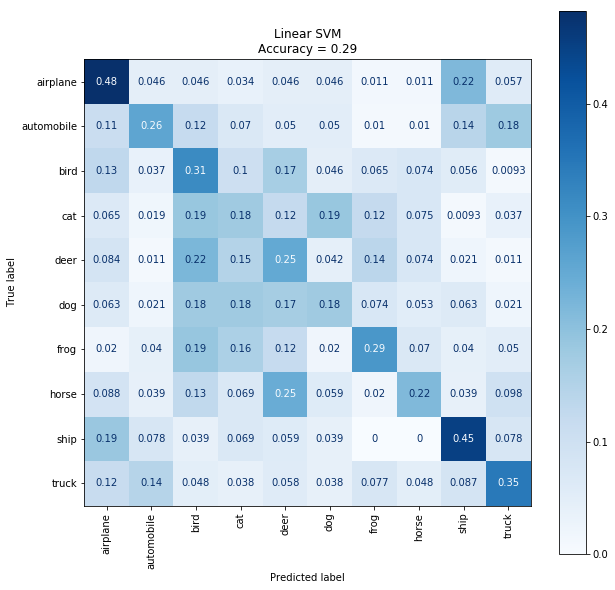

In [9]:
plot_model_results(y_true, y_pred, class_names, model_name="Linear SVM")